Max Two Envelopes Simulation
===

Analysis for: https://levon003.github.io/2024/02/26/max-envelope-problem.html

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binomtest

In [2]:
rng = np.random.default_rng()

In [3]:
n = 10000000
envelope_values = rng.normal(size=(n, 2))
envelope_values.shape

(10000000, 2)

In [9]:
is_B_larger = envelope_values[:,1] > envelope_values[:,0]

results = []
for name, decision_values in [
    ("Random", None),
    ("Matching", rng.normal(size=n)),
    ("Wide", rng.normal(scale=2.0, size=n)),
    ("Shifted", rng.normal(loc=2.0, size=n)),
]:
    # determine if we should swap and choose B instead of A
    if decision_values is not None:
        will_choose_B = decision_values > envelope_values[:,0]
    else:
        will_choose_B = False
    was_correct = np.logical_not(np.logical_xor(is_B_larger, will_choose_B))
    correct_count = was_correct.sum()
    results.append((name, correct_count))
len(results)

4

In [16]:
# note: obviously, these CIs are so small it turns out to not be worth showing them
cis = []
ys_pct = []
for name, count in results:
    binom = binomtest(k=count, n=n, p=0.5)
    cis.append(tuple(binom.proportion_ci()))
    ys_pct.append(count / n)
cis

[(0.4997866524991894, 0.5004065474448806),
 (0.666634784625184, 0.6672191187253529),
 (0.6020809894940605, 0.6026877512264531),
 (0.5551140461285233, 0.555730121782801)]

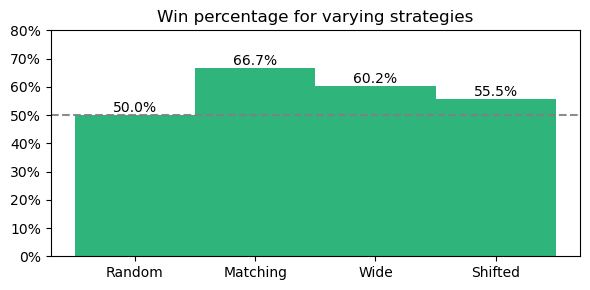

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
xs = [0, 1, 2, 3]
ys_pct = np.array(ys_pct)
#cis = np.array(cis).T

ax.bar(xs, ys_pct, color=matplotlib.cm.viridis(0.65189), width=1)
ax.axhline(0.5, color="gray", alpha=0.9, linestyle="--")
for i, pct in enumerate(ys_pct):
    ax.text(i, pct, f"{pct:.1%}", ha="center", va="bottom")
#cis_delta = np.abs(cis - ys_pct)
#ax.errorbar(xs, ys_pct, yerr=cis_delta, ecolor="black", capsize=2, elinewidth=1, linewidth=0)

margin = 0.0001
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, pos: f"{y:.0%}"))
#ax.xaxis.set_major_formatter(lambda x, pos: f"{x:,.0f}g")
ax.set_ylim((0, 0.8))
ax.set_xticks(ticks=xs, labels=[name for name, _ in results])
ax.set_title("Win percentage for varying strategies")

fig.tight_layout()
fig.savefig("../images/max-envelope-problem-simulation.png")
plt.show()